In [1]:
#statistical testing with merged dataset

In [2]:
%matplotlib inline

#Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#The Walmart and census data was merged by zip code, then saved as a CSV. 
#Will work with the saved CSV instead of re-running code.

file_stat = "combineddata1.csv"

In [4]:
#Turn into Pandas dataframe
merged_data = pd.read_csv(file_stat, encoding="utf-8")
merged_data.head()

,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,4,Walmart Supercenter,2901 Highway 412 E,Siloam Springs,AR,72761,22314,31.5,48064,21146,3887,17.419557
1,1,8,Walmart Supercenter,1621 North Business 9,Morrilton,AR,72110,10913,40.0,37808,22314,2302,21.094108
2,2,5,Walmart Supercenter,1155 Hwy 65 North,Conway,AR,72032,32508,34.1,44686,22699,5311,16.337517
3,3,7,Walmart Supercenter,9053 Highway 107,Sherwood,AR,72120,33161,38.7,63575,30459,3654,11.018968
4,4,3,Walmart Supercenter,30983 Highway 441 S,Commerce,GA,30529,10766,36.8,44854,21262,1840,17.090842


In [8]:

#Define income categories as low, middle, and high
#Define poverty rate for test samples- probably won't use in this code
lowIncome = merged_data.loc[merged_data["Household Income"] < 34999]
midIncome = merged_data.loc[(merged_data["Household Income"] >=35000) & (merged_data["Household Income"] <=99999)]
highIncome = merged_data.loc[merged_data["Household Income"] >=100000]
merged_data["Poverty Rate"] = merged_data["Poverty Rate"].astype(float)
test1 = merged_data.loc[merged_data["Poverty Rate"] < 19.99]
test2 = merged_data.loc[(merged_data["Poverty Rate"] > 20) & (merged_data["Poverty Rate"] < 39.99)]
test3 = merged_data.loc[merged_data["Poverty Rate"] > 40]

In [9]:
low = lowIncome.count()
mid = midIncome.count()
high = highIncome.count()


In [10]:
Incomesummary_table_df = ({"Low Income Count": low,
                                    "Middle Income Count": mid,
                              "High Income Count": high})
Incomesummary_table_df

{'Low Income Count': Unnamed: 0           348
 Store Number         348
 Store Type           348
 Address              348
 City                 348
 State                348
 Zipcode              348
 Population           348
 Median Age           348
 Household Income     348
 Per Capita Income    348
 Poverty Count        348
 Poverty Rate         348
 dtype: int64, 'Middle Income Count': Unnamed: 0           4418
 Store Number         4418
 Store Type           4418
 Address              4418
 City                 4417
 State                4418
 Zipcode              4418
 Population           4418
 Median Age           4418
 Household Income     4418
 Per Capita Income    4418
 Poverty Count        4418
 Poverty Rate         4418
 dtype: int64, 'High Income Count': Unnamed: 0           199
 Store Number         199
 Store Type           199
 Address              199
 City                 199
 State                199
 Zipcode              199
 Population           199
 Median Age

In [11]:
pd.DataFrame.from_dict(Incomesummary_table_df, orient = 'index')


,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
High Income Count,199,199,199,199,199,199,199,199,199,199,199,199,199
Low Income Count,348,348,348,348,348,348,348,348,348,348,348,348,348
Middle Income Count,4418,4418,4418,4418,4417,4418,4418,4418,4418,4418,4418,4418,4418


In [12]:
#Define bar chart data
income = ["Low Income", "Middle Income", "High Income"]
bars_in_income = [348, 4418,199]
x_axis = np.arange(len(bars_in_income))

Text(0,0.5,"Number of Walmart's")

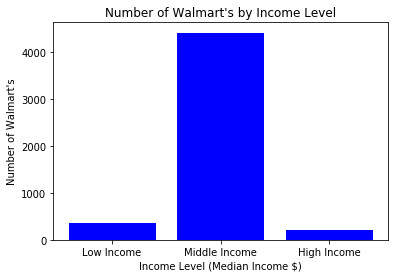

In [13]:
#Plot bar chart
plt.bar(x_axis, bars_in_income, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, income)
plt.title("Number of Walmart's by Income Level")
plt.xlabel("Income Level (Median Income $)")
plt.ylabel("Number of Walmart's")


In [14]:
#Start over with a new dataframe
file_stat1 = "combineddata1.csv"

In [15]:
#Turn into Pandas dataframe
merged_data1_pd = pd.read_csv(file_stat1, encoding="utf-8")
merged_data1_pd.head()

,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,4,Walmart Supercenter,2901 Highway 412 E,Siloam Springs,AR,72761,22314,31.5,48064,21146,3887,17.419557
1,1,8,Walmart Supercenter,1621 North Business 9,Morrilton,AR,72110,10913,40.0,37808,22314,2302,21.094108
2,2,5,Walmart Supercenter,1155 Hwy 65 North,Conway,AR,72032,32508,34.1,44686,22699,5311,16.337517
3,3,7,Walmart Supercenter,9053 Highway 107,Sherwood,AR,72120,33161,38.7,63575,30459,3654,11.018968
4,4,3,Walmart Supercenter,30983 Highway 441 S,Commerce,GA,30529,10766,36.8,44854,21262,1840,17.090842


In [16]:
# Create the bins for data categories: low, middle, high

#bins = [0, 34999, 99999, 100000]
bins = [0, 34998, 99999, 500000]
# Create the names for the four bins
group_names = ["Lt 34999", "34999-99999", "gt 100000"]

In [17]:
merged_data1_pd["Income Categories"] = pd.cut(merged_data1_pd["Household Income"], bins, labels=group_names)
merged_data1_pd.head()

,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Income Categories
0,0,4,Walmart Supercenter,2901 Highway 412 E,Siloam Springs,AR,72761,22314,31.5,48064,21146,3887,17.419557,34999-99999
1,1,8,Walmart Supercenter,1621 North Business 9,Morrilton,AR,72110,10913,40.0,37808,22314,2302,21.094108,34999-99999
2,2,5,Walmart Supercenter,1155 Hwy 65 North,Conway,AR,72032,32508,34.1,44686,22699,5311,16.337517,34999-99999
3,3,7,Walmart Supercenter,9053 Highway 107,Sherwood,AR,72120,33161,38.7,63575,30459,3654,11.018968,34999-99999
4,4,3,Walmart Supercenter,30983 Highway 441 S,Commerce,GA,30529,10766,36.8,44854,21262,1840,17.090842,34999-99999


In [18]:
merged_data1_pd[['City']] = merged_data1_pd['City'].str.strip()
merged_data1_pd.head()

,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Income Categories
0,0,4,Walmart Supercenter,2901 Highway 412 E,Siloam Springs,AR,72761,22314,31.5,48064,21146,3887,17.419557,34999-99999
1,1,8,Walmart Supercenter,1621 North Business 9,Morrilton,AR,72110,10913,40.0,37808,22314,2302,21.094108,34999-99999
2,2,5,Walmart Supercenter,1155 Hwy 65 North,Conway,AR,72032,32508,34.1,44686,22699,5311,16.337517,34999-99999
3,3,7,Walmart Supercenter,9053 Highway 107,Sherwood,AR,72120,33161,38.7,63575,30459,3654,11.018968,34999-99999
4,4,3,Walmart Supercenter,30983 Highway 441 S,Commerce,GA,30529,10766,36.8,44854,21262,1840,17.090842,34999-99999


In [21]:
#get number if stores per zip code
zip_data_pd = merged_data1_pd.groupby('Zipcode').agg(
    {
        'Store Number':'count'
    }
).rename(columns={"Store Number":"Number of Stores"})
zip_data_pd.head()

,Number of Stores
Zipcode,
617,1
659,1
662,1
674,1
680,1


In [22]:
#Merge
storecount_pd = pd.merge(zip_data_pd, merged_data1_pd, on="Zipcode", how="left")

#Check new dataframe
storecount_pd.head()

,Zipcode,Number of Stores,Unnamed: 0,Store Number,Store Type,Address,City,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Income Categories
0,617,1,2074,2302,Walmart Supercenter,Carr #2 Km 26.6,Barceloneta,PR,24508,38.7,17157,8762,11774,48.041456,Lt 34999
1,659,1,1708,1854,Walmart,Plaza Del Norte Carr #2 Km 81.9,Hatillo,PR,40978,40.7,17770,10360,18522,45.199863,Lt 34999
2,662,1,1938,2085,Walmart,3535 Military Ave,Isabela,PR,41341,40.6,16771,8883,21976,53.157882,Lt 34999
3,674,1,3128,3716,Walmart Supercenter,Plaza Monte Real,Manati,PR,40826,41.1,18032,10520,18834,46.132367,Lt 34999
4,680,1,1913,2067,Walmart,975 Avenue Hostos Ste 2100,Mayaguez,PR,48035,41.6,14500,10277,23993,49.948996,Lt 34999


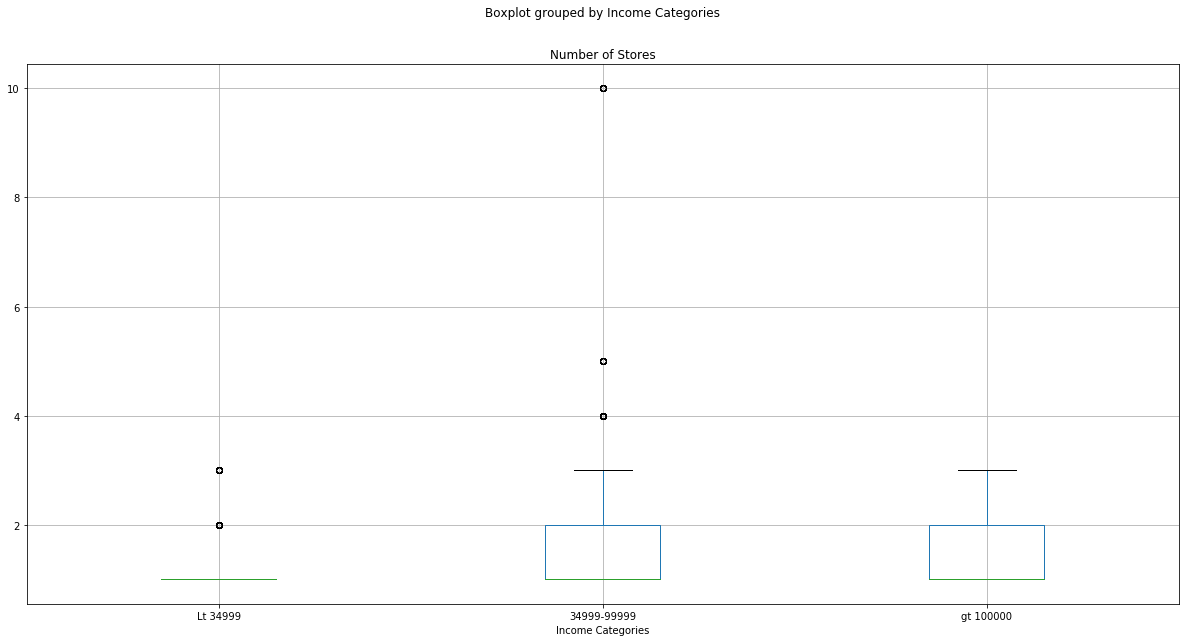

In [23]:
# Create a boxplot for comparison of means of the income categories
storecount_pd.boxplot("Number of Stores", by="Income Categories", figsize=(20, 10))

In [26]:
import scipy.stats as stats

In [27]:
# Extract individual groups
group1 = storecount_pd[storecount_pd["Income Categories"] == "Lt 34999"]["Number of Stores"]
group2 = storecount_pd[storecount_pd["Income Categories"] == "34999-99999"]["Number of Stores"]
group3 = storecount_pd[storecount_pd["Income Categories"] == "gt 100000"]["Number of Stores"]

In [28]:
 # Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=18.38605374288465, pvalue=1.1078480497733017e-08)

In [ ]:
#Don't necessarily meet normality condition- run Kruskal Wallis test 

In [29]:
#But first run t test
storecount1_pd = storecount_pd.rename(columns={"Household Income":"Income"})

In [30]:
wal_population1 = storecount1_pd[storecount1_pd["Number of Stores"] == 1]
wal_population1.Income.mean()

56278.02375296912

In [31]:
wal_population2 = storecount1_pd[storecount1_pd["Number of Stores"] > 1]
wal_population2.Income.mean()

59547.8303068253

In [32]:
stats.ttest_ind(wal_population1.Income, wal_population2.Income, equal_var=False)

Ttest_indResult(statistic=-5.5933432412955, pvalue=2.404329337629405e-08)

(10000, 170000)

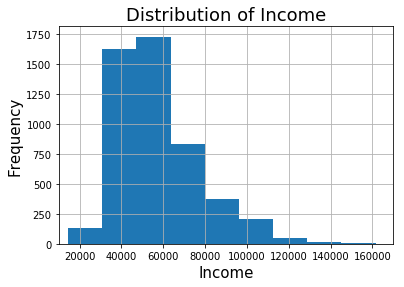

In [33]:

storecount1_pd.hist(column="Income")
plt.title("Distribution of Income", fontsize=18)
plt.xlabel("Income",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([10000,170000])

In [34]:
 # Perform nonparametric ANOVA (Kruskal Wallis)
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=39.393076403849875, pvalue=2.791914706041674e-09)